In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from utils.paths import DATA_RAW_DIR

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
path_partidos = str(DATA_RAW_DIR / 'partidos_cebollitas.csv')

print('Path:', path_partidos)
print('Does path exist?', Path(path_partidos).exists())

Path: /Users/jssdev/Dev/Learning/Platzi/platzi-machine-learning/data/raw/partidos_cebollitas.csv
Does path exist? True


In [3]:
df_partidos = pd.read_csv(path_partidos, sep=',', encoding='utf-8')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [4]:
df_partidos[['tiros_arco_local']]

,tiros_arco_local
0,12
1,12
2,10
3,3
4,7
...,...
95,11
96,4
97,4
98,9


## ¿Cuándo usar `MinMaxScaler`?

- **Rango fijo [0,1]**: ideal para redes neuronales, k-NN, SVM…
- **No asume normalidad** de los datos.
- **Conservar forma** de la distribución.

## Alternativas

- **`StandardScaler`**: centra en 0, σ=1 (datos ~gausianos).  
- **`RobustScaler`**: usa percentiles, resistente a outliers.  
- **Árboles (RF, XGBoost…)**: no requieren escalado.  

In [5]:
scarler_normal = MinMaxScaler()


In [6]:
df_partidos['tiros_arco_local_normalizado'] = scarler_normal.fit_transform(df_partidos[['tiros_arco_local']])

In [7]:
df_partidos[['tiros_arco_visitante']]

,tiros_arco_visitante
0,6
1,3
2,7
3,3
4,12
...,...
95,5
96,6
97,9
98,9


In [8]:
df_partidos['tiros_arco_visitante_normalizado'] = scarler_normal.fit_transform(df_partidos[['tiros_arco_visitante']])

In [18]:
print(df_partidos[['tiros_arco_local','tiros_arco_local_normalizado']].head())


   tiros_arco_local  tiros_arco_local_normalizado
0                12                      1.000000
1                12                      1.000000
2                10                      0.777778
3                 3                      0.000000
4                 7                      0.444444


In [19]:
print(df_partidos[['tiros_arco_visitante','tiros_arco_visitante_normalizado']].head())

   tiros_arco_visitante  tiros_arco_visitante_normalizado
0                     6                          0.333333
1                     3                          0.000000
2                     7                          0.444444
3                     3                          0.000000
4                    12                          1.000000


## ¿Cuándo usar `StandardScaler`?

- Variables con distribución **aprox. normal**.  
- Modelos que se benefician de **media 0 y σ=1** (Regresión lineal, SVM, PCA).  
- **Acelera** la convergencia de optimizadores basados en gradiente.

## Alternativas

- `MinMaxScaler`: rango [0,1], ideal en redes neuronales, k-NN.  
- `RobustScaler`: usa percentiles, **resiste outliers**.  
- Árboles (RF, XGBoost…): **no requieren** escalado.  

In [20]:
scaler_std = StandardScaler()

In [21]:
df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])

In [22]:
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])

In [23]:
df_partidos[['posesion_local (%)','posesion_local_std']].head()

,posesion_local (%),posesion_local_std
0,54,0.624415
1,60,1.623479
2,55,0.790926
3,57,1.123947
4,52,0.291394


In [24]:
df_partidos[['posesion_visitante (%)','posesion_visitante_std']].head()

,posesion_visitante (%),posesion_visitante_std
0,46,-0.624415
1,40,-1.623479
2,45,-0.790926
3,43,-1.123947
4,48,-0.291394


Graficar

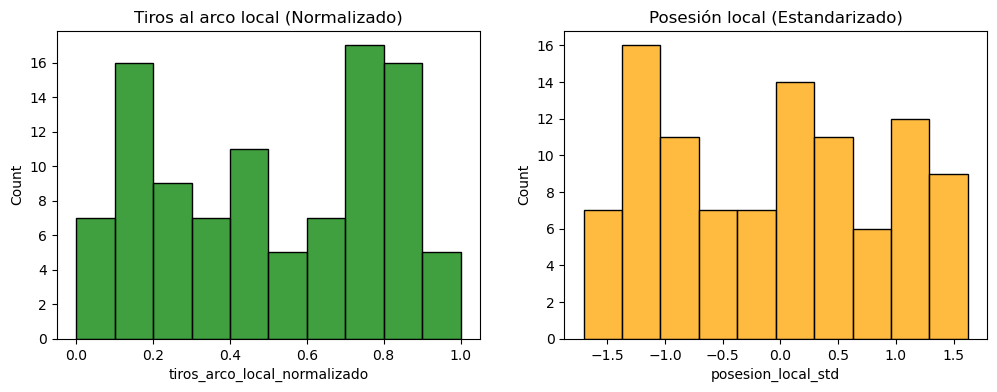

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Visualizar tiros al arco (Normalización)
sns.histplot(x=df_partidos['tiros_arco_local_normalizado'], bins=10, ax=ax[0], color='green')
ax[0].set_title("Tiros al arco local (Normalizado)")

# Visualizar posesión local (Estandarización)
sns.histplot(x=df_partidos['posesion_local_std'], bins=10, ax=ax[1], color='orange')
ax[1].set_title("Posesión local (Estandarizado)")

plt.show()